## Libraries and Data Import

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler

In [ ]:
test_data = pd.read_csv("SalaryData_Test.csv")
print("First Three Entries in the Test data are")
test_data.head(3)

First Three Entries in the Test data are


,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K


In [ ]:
train_data = pd.read_csv("SalaryData_Train.csv")
print("First Three Entries in the Train data are")
train_data.head(3)

First Three Entries in the Train data are


,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K


In [ ]:
test_data = pd.read_csv("SalaryData_Test.csv")
print("Last Three Entries in the Test data are")
test_data.tail(3)

Last Three Entries in the Test data are


,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
15057,38,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
15058,44,Private,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K
15059,35,Self-emp-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,60,United-States,>50K


In [ ]:
train_data = pd.read_csv("SalaryData_Train.csv")
print("Last Three Entries in the Train data are")
train_data.tail(3)

Last Three Entries in the Train data are


,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
30158,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
30159,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
30160,52,Self-emp-inc,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


## Data Exploration

In [ ]:
print(f"The total (Entries,Features) in the Training Data are respectively {train_data.shape}")

The total (Entries,Features) in the Training Data are respectively (30161, 14)


In [ ]:
print(f"The total (Entries,Features) in the Testing Data are respectively {test_data.shape}")

The total (Entries,Features) in the Testing Data are respectively (15060, 14)


In [ ]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15060 entries, 0 to 15059
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            15060 non-null  int64 
 1   workclass      15060 non-null  object
 2   education      15060 non-null  object
 3   educationno    15060 non-null  int64 
 4   maritalstatus  15060 non-null  object
 5   occupation     15060 non-null  object
 6   relationship   15060 non-null  object
 7   race           15060 non-null  object
 8   sex            15060 non-null  object
 9   capitalgain    15060 non-null  int64 
 10  capitalloss    15060 non-null  int64 
 11  hoursperweek   15060 non-null  int64 
 12  native         15060 non-null  object
 13  Salary         15060 non-null  object
dtypes: int64(5), object(9)
memory usage: 1.6+ MB


In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            30161 non-null  int64 
 1   workclass      30161 non-null  object
 2   education      30161 non-null  object
 3   educationno    30161 non-null  int64 
 4   maritalstatus  30161 non-null  object
 5   occupation     30161 non-null  object
 6   relationship   30161 non-null  object
 7   race           30161 non-null  object
 8   sex            30161 non-null  object
 9   capitalgain    30161 non-null  int64 
 10  capitalloss    30161 non-null  int64 
 11  hoursperweek   30161 non-null  int64 
 12  native         30161 non-null  object
 13  Salary         30161 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.2+ MB


In [ ]:
train_data.isnull().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [ ]:
test_data.isnull().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [ ]:
train_data[train_data.duplicated()]

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
326,33,Private,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
364,27,Private,Bachelors,13,Never-married,Craft-repair,Not-in-family,White,Male,0,0,50,United-States,<=50K
518,24,Private,HS-grad,9,Never-married,Handlers-cleaners,Unmarried,Black,Female,0,0,40,United-States,<=50K
525,24,Private,HS-grad,9,Never-married,Craft-repair,Own-child,White,Male,0,0,40,United-States,<=50K
619,33,Private,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30110,47,Private,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
30118,20,Private,HS-grad,9,Never-married,Machine-op-inspct,Own-child,White,Male,0,0,40,United-States,<=50K
30132,22,Private,Some-college,10,Never-married,Adm-clerical,Own-child,White,Male,0,0,40,United-States,<=50K
30157,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K


In [ ]:
test_data[test_data.duplicated()]

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
551,59,Private,HS-grad,9,Divorced,Other-service,Not-in-family,White,Female,0,0,40,United-States,<=50K
601,32,Private,HS-grad,9,Married-civ-spouse,Sales,Husband,White,Male,0,0,40,United-States,<=50K
681,40,Private,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
799,24,Private,Bachelors,13,Never-married,Prof-specialty,Not-in-family,White,Male,0,0,35,United-States,<=50K
1044,44,Private,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,99999,0,60,United-States,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15043,51,Private,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
15044,22,Private,Some-college,10,Never-married,Craft-repair,Own-child,White,Male,0,0,40,United-States,<=50K
15049,32,Private,HS-grad,9,Married-civ-spouse,Handlers-cleaners,Husband,White,Male,0,0,40,United-States,<=50K
15052,31,Private,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K


### Eventhough we donot have null values we have duplicated values in both the training and testing data.

## However, SVM is not sensitive to duplicated data  considering the increase in computational complexity of SVM training, as the algorithm may need to process redundant information. To improve efficiency and avoid potential issues with model performance.


1. Training data should be free of Duplicates- we shall handle it during the data preprocessing


## EDA

In [ ]:
train_data_list = train_data.columns.to_list()
test_data_list = test_data.columns.to_list()
if len(train_data_list) == len(test_data_list):  ## Now we don't need to check it for test data
    print(f"Different Features in the Train Data are following \n\n {train_data_list} ")

Different Features in the Train Data are following 

 ['age', 'workclass', 'education', 'educationno', 'maritalstatus', 'occupation', 'relationship', 'race', 'sex', 'capitalgain', 'capitalloss', 'hoursperweek', 'native', 'Salary'] 


In [ ]:
numerical_features = [feature for feature in train_data.columns if train_data[feature].dtype != 'object']
print(f"The number of Numerical Features in the Train Dataset is {len(numerical_features)}")
categorical_features = [feature for feature in train_data.columns if train_data[feature].dtype == 'object']
print(f"The number of Categorical Features in the Train Dataset is {len(categorical_features)}")

The number of Numerical Features in the Train Dataset is 5
The number of Categorical Features in the Train Dataset is 9


In [ ]:
testnumerical_features = [feature for feature in test_data.columns if test_data[feature].dtype != 'object']
print(f"The number of Numerical Features in the Test Dataset is {len(testnumerical_features)}")
testcategorical_features = [feature for feature in test_data.columns if test_data[feature].dtype == 'object']
print(f"The number of Categorical Features in the Test Dataset is {len(testcategorical_features)}")

The number of Numerical Features in the Test Dataset is 5
The number of Categorical Features in the Test Dataset is 9


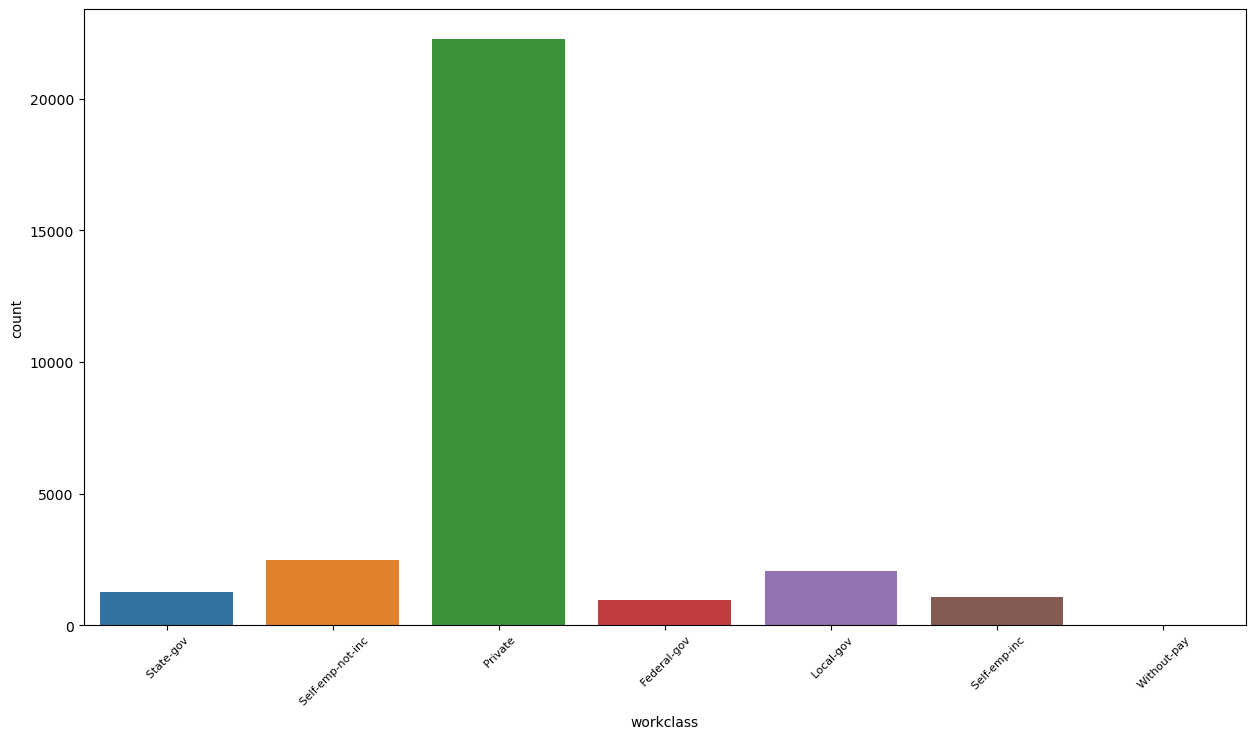

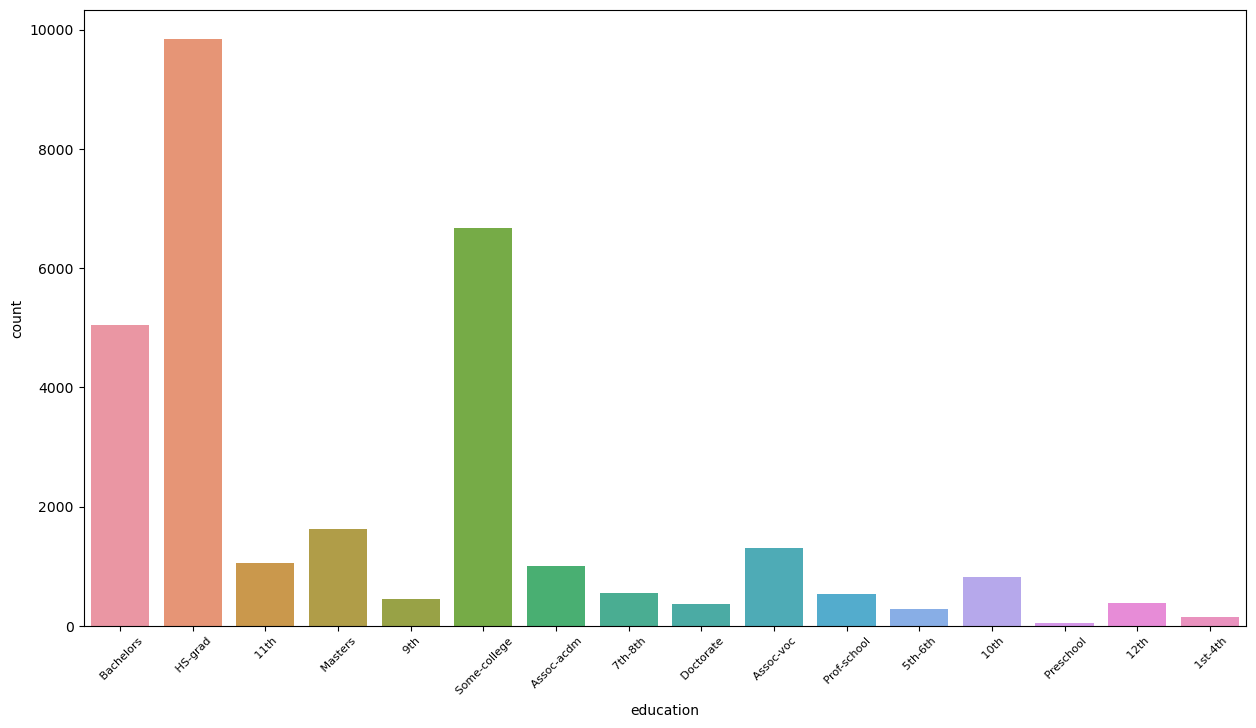

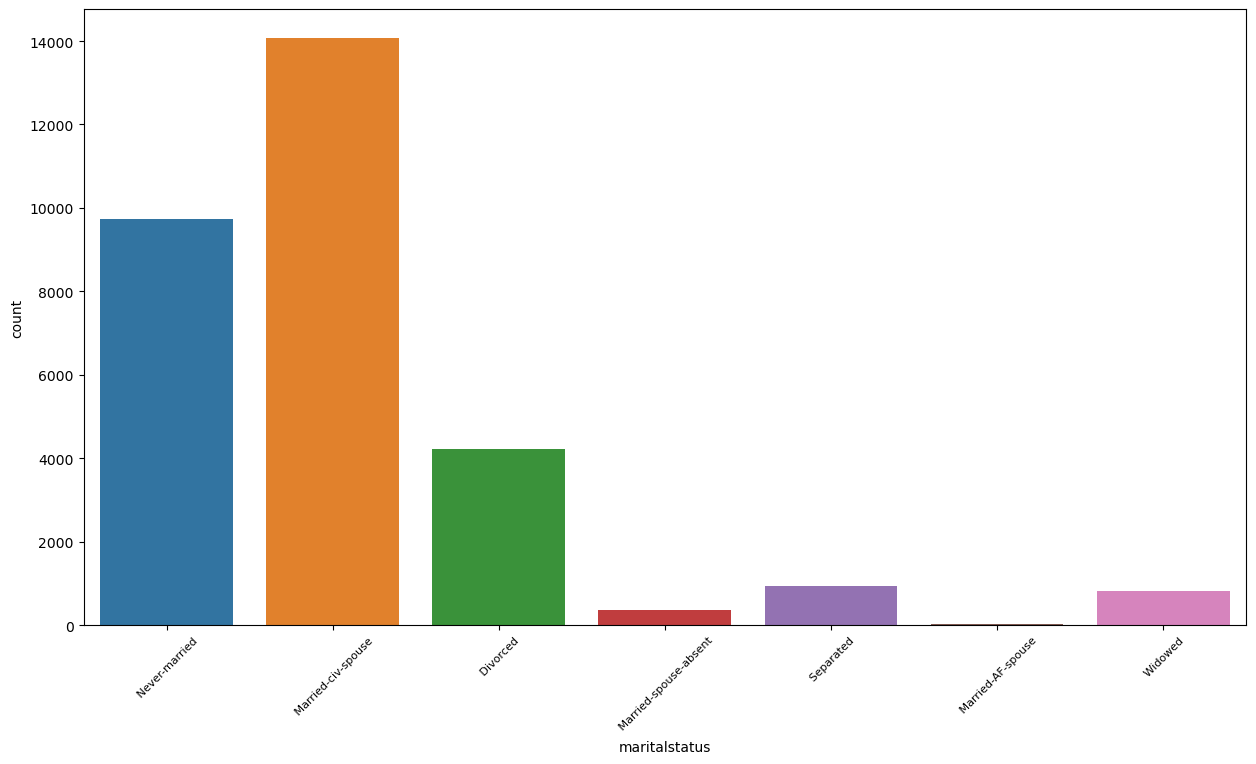

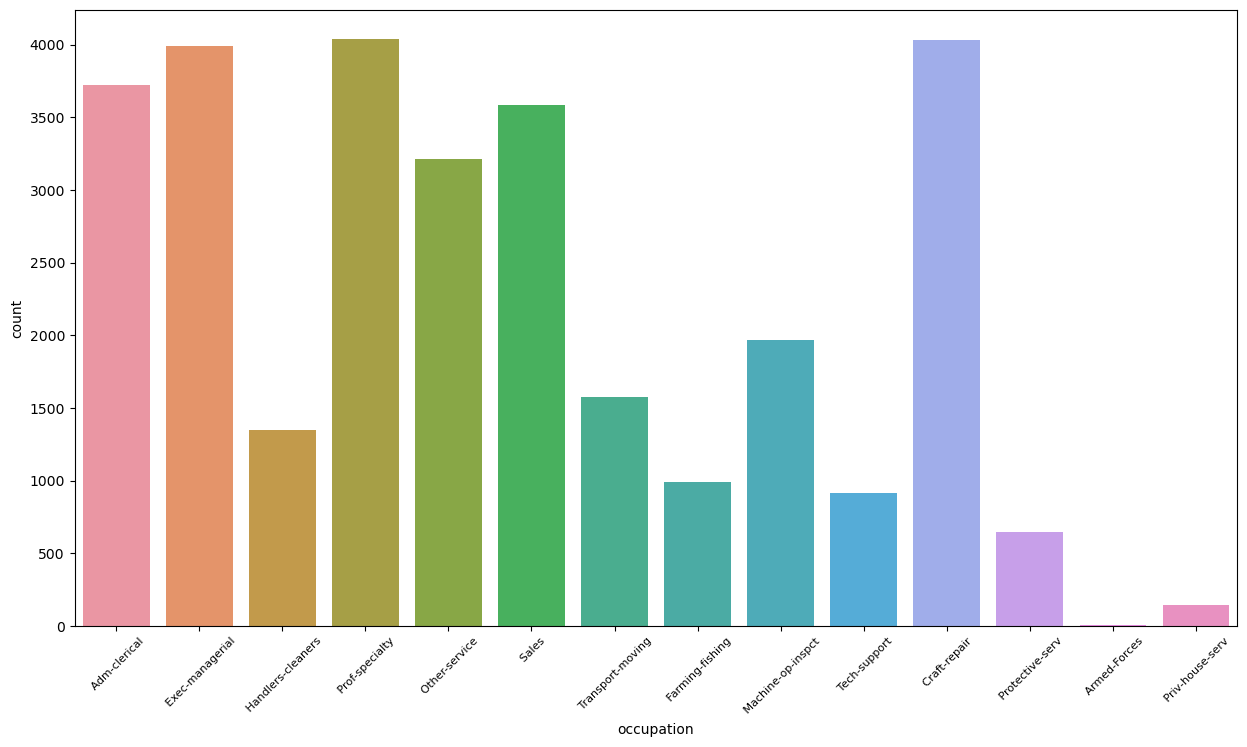

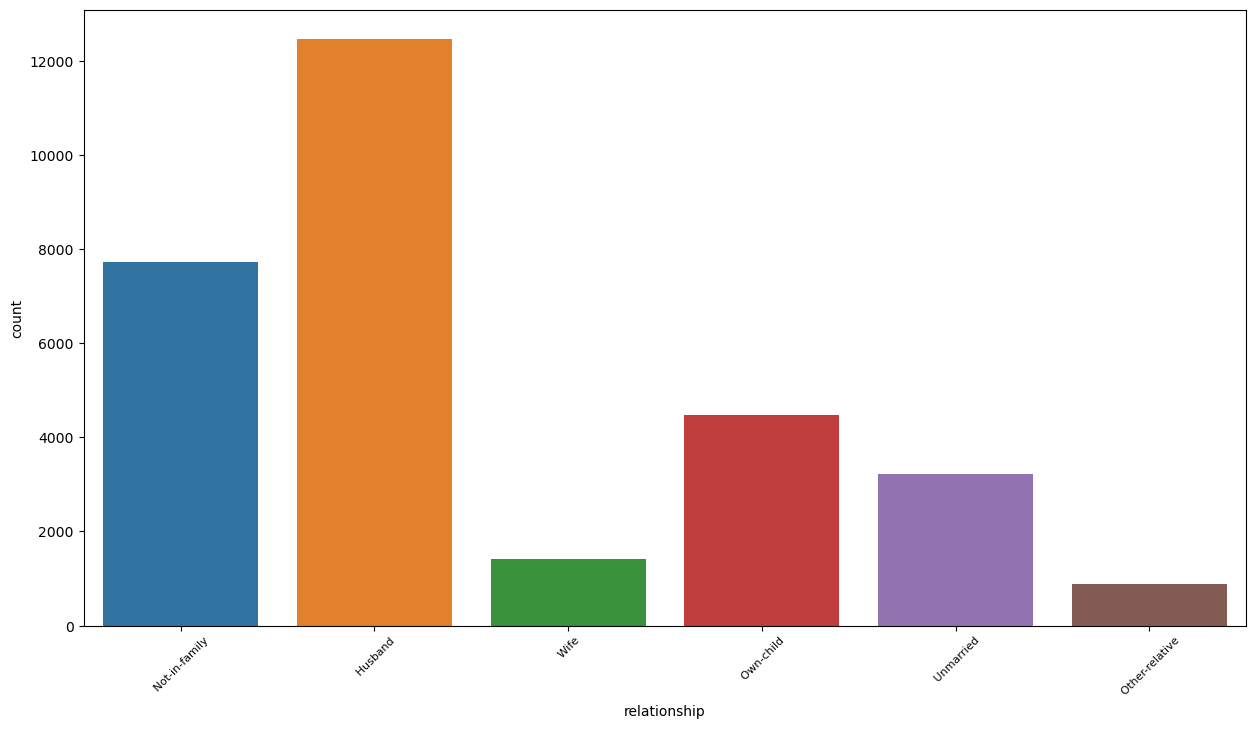

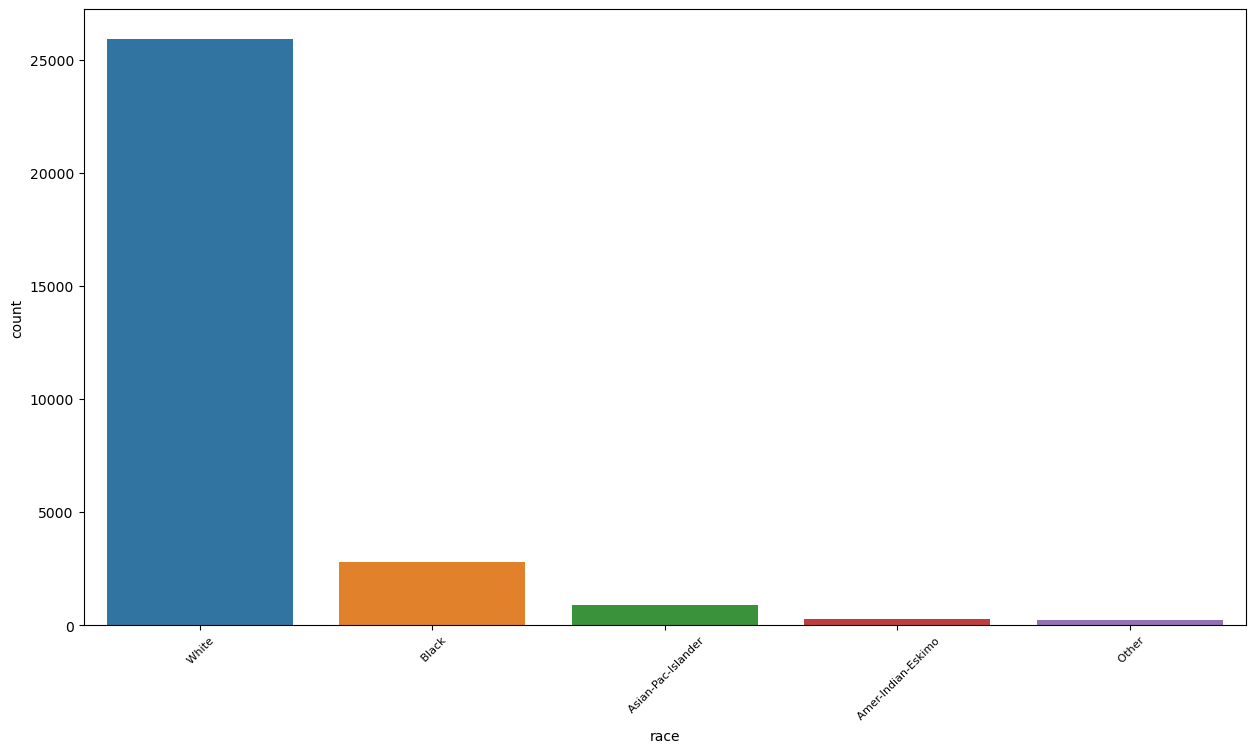

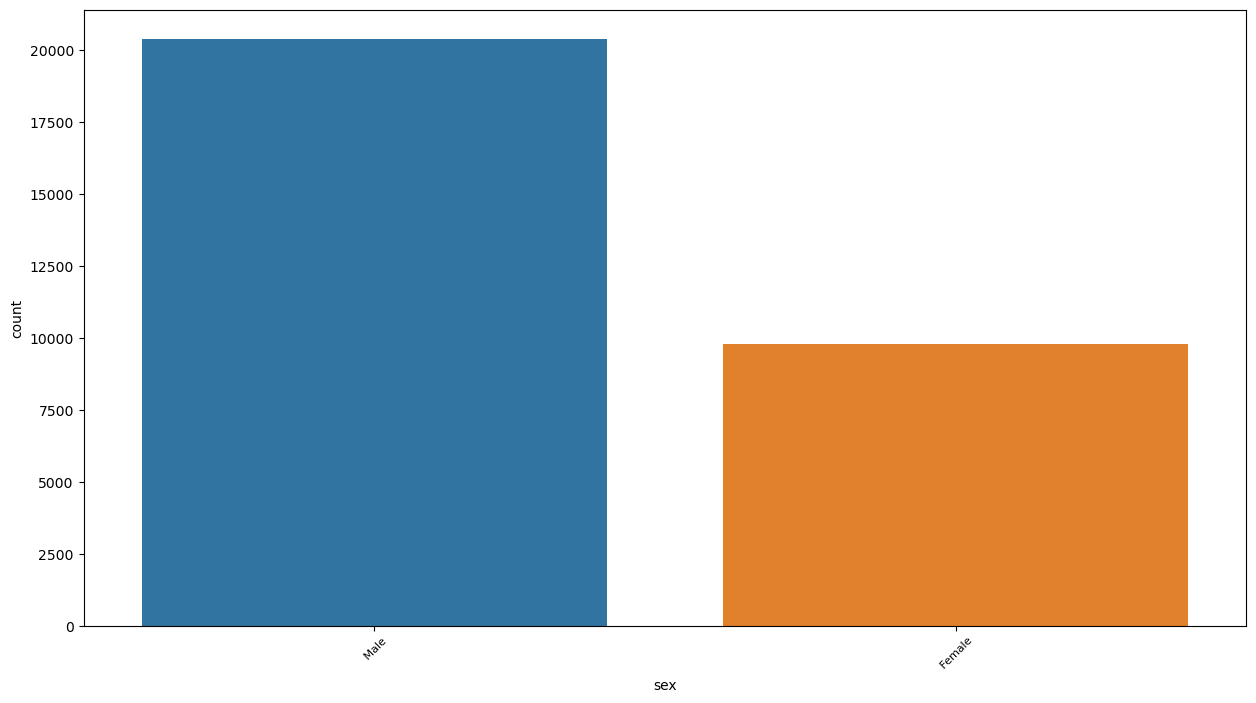

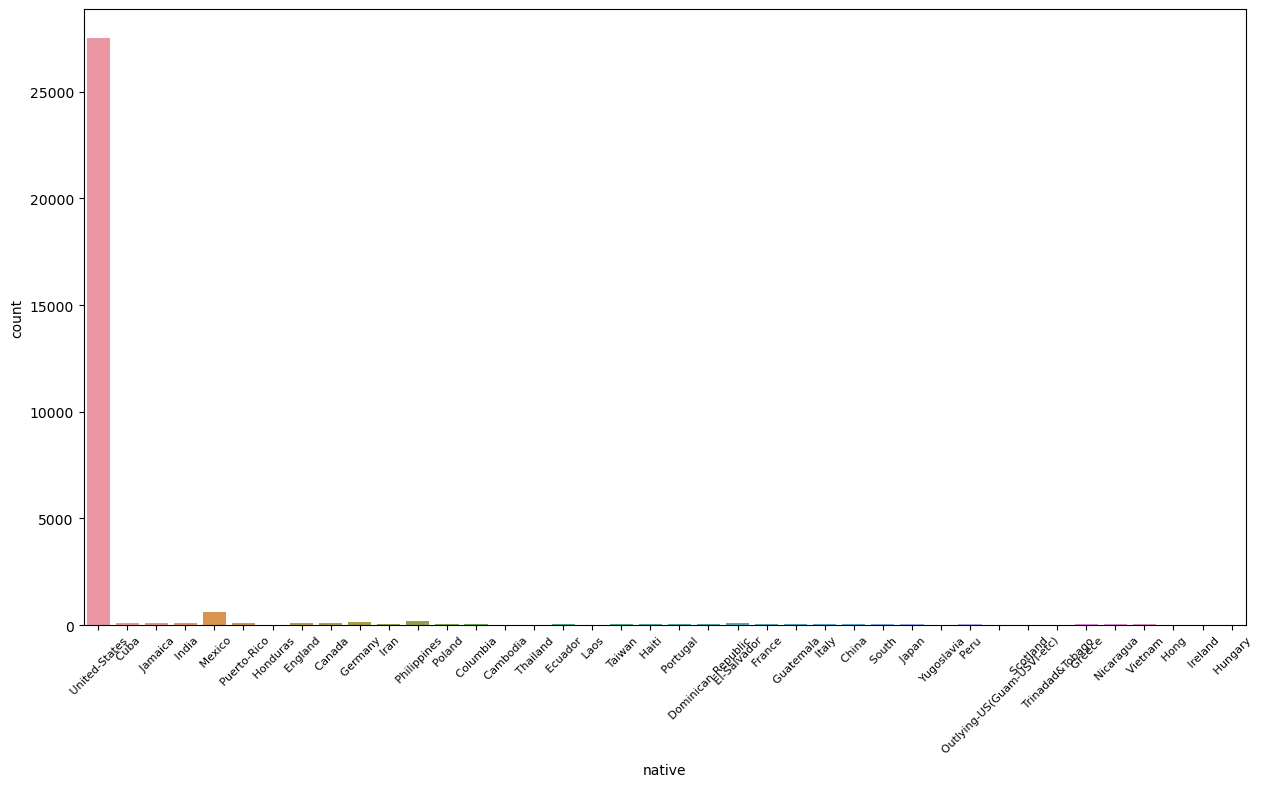

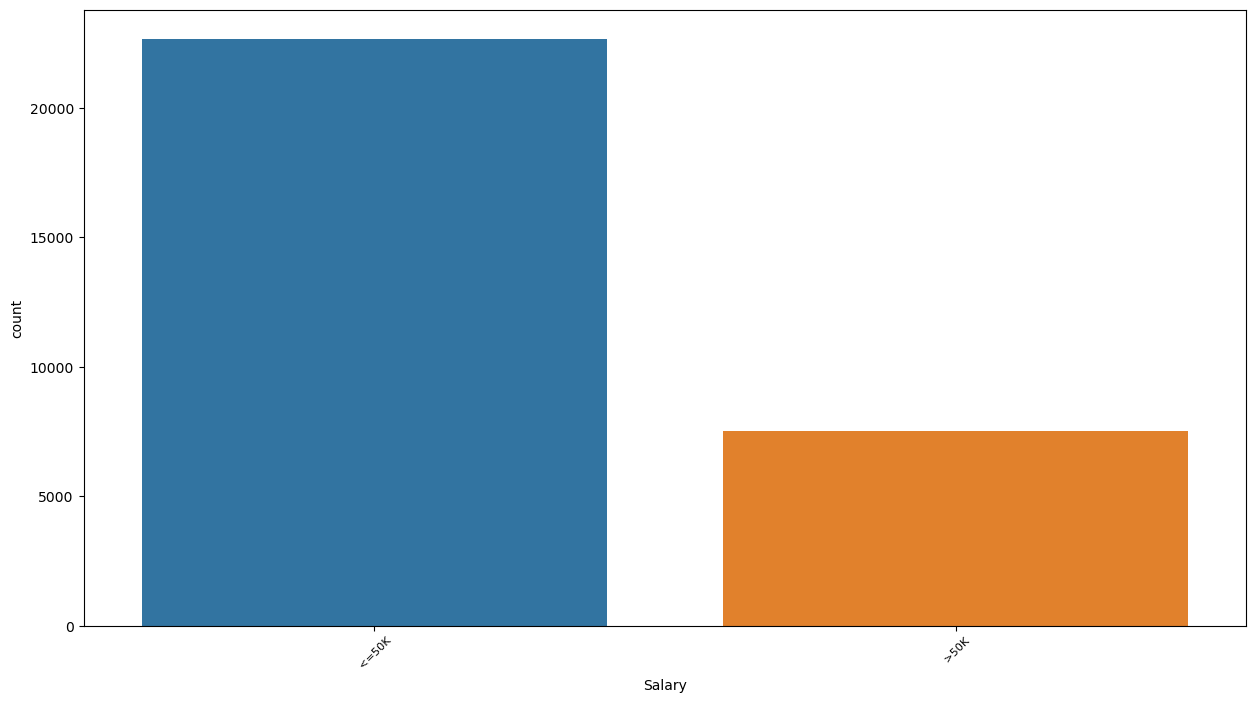

In [ ]:
for col in categorical_features:
    plt.figure(figsize=(15,8))
    sns.countplot(x=col,data=train_data)
    plt.xticks(rotation = 45,fontsize=8)
    plt.show()

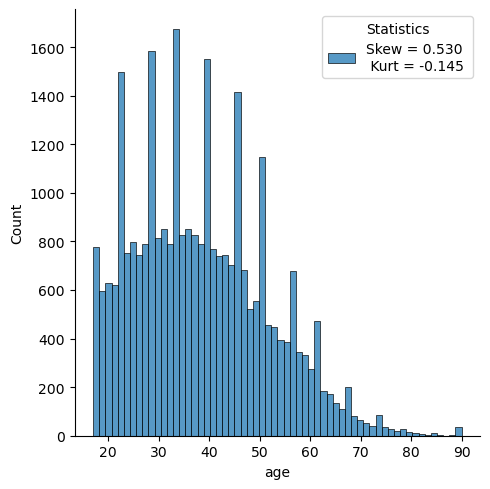

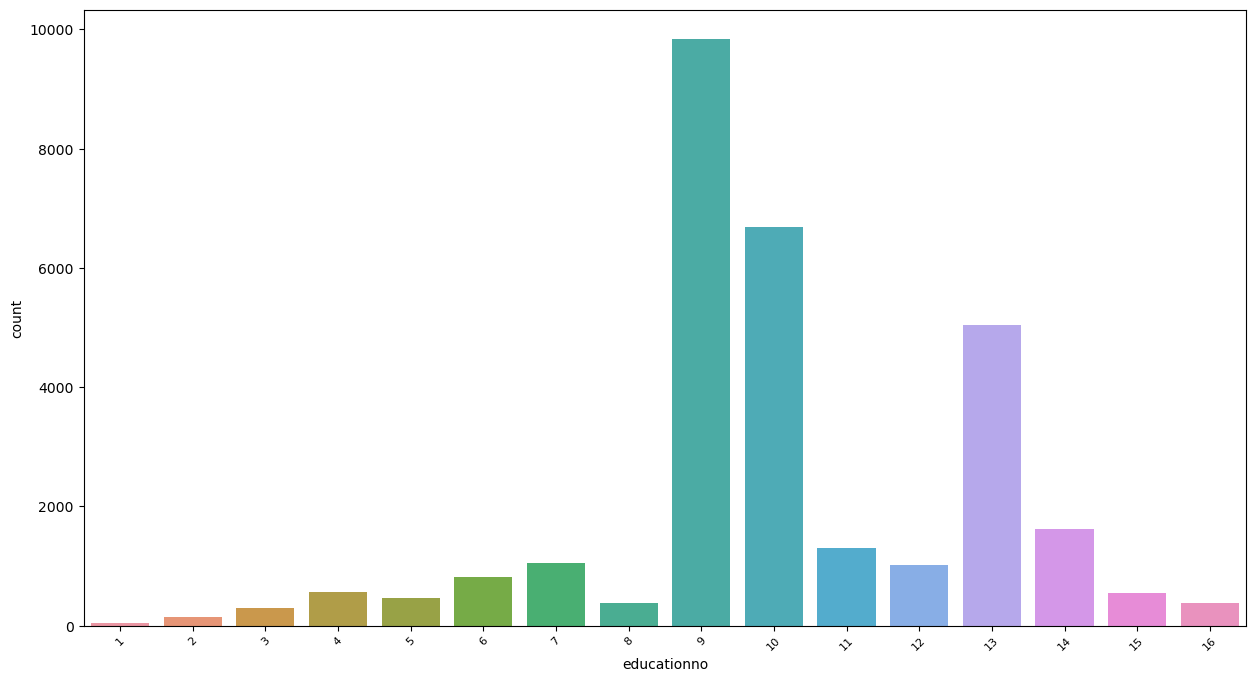

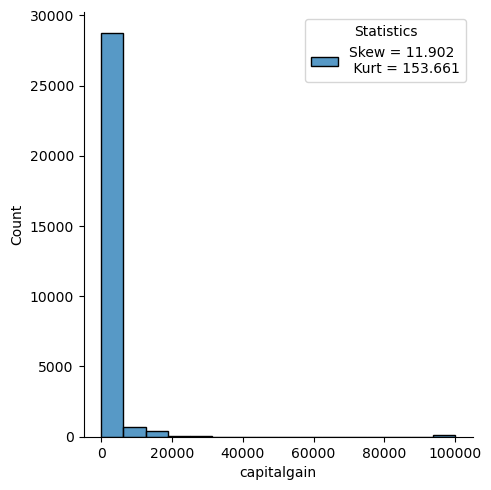

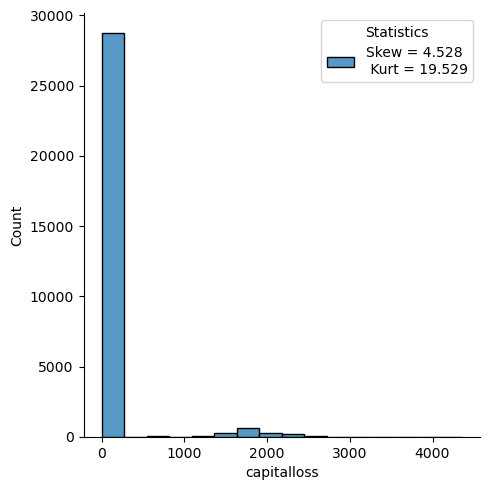

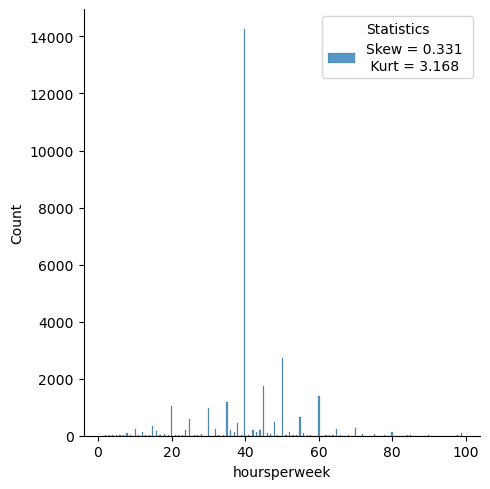

In [ ]:
for col in numerical_features:
    if (len(list(train_data[col].unique())) < 25):
        plt.figure(figsize=(15,8))
        sns.countplot(x=col,data=train_data)
        plt.xticks(rotation = 45,fontsize=8)
        plt.show()
    else:
        skew = train_data[col].skew()
        kurt = train_data[col].kurt()
        sns.displot(train_data[col],kde=False,label='Skew = %.3f \n Kurt = %.3f' %(skew,kurt))
        plt.legend(title='Statistics')
        plt.show()

## Note worthy observations from EDA :-
2. In general the continus numerical features have high skewness and kurtosis value we can handle it by scaling it during Data preprocessing. Such that it's high magnitude will have negligible effect on the algorithm. While the algorithm maps independent variable to the dependent variable.

3. The dependent variable i.e. "Salary" seems highly imbalanced, however SVM is insensitive to imbalanced sample (I will be use undersampling and Oversampling to Figuratively picture what is the effect of imbalance)

## Data Preprocessing :-
1. Handling the duplicate data by elimnating them

In [ ]:
train_data.drop_duplicates(inplace=True)

In [ ]:
train_data.shape

(26903, 14)

2. Standarad Scaling of the numerical Data and Label encoding for the categorical data

In [ ]:
scaler = StandardScaler()
le = LabelEncoder()

In [ ]:
for col in categorical_features:
    train_data[col] = le.fit_transform(train_data[col])
train_data.head(3)

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,5,9,13,4,0,1,4,1,2174,0,40,37,0
1,50,4,9,13,2,3,0,4,1,0,0,13,37,0
2,38,2,11,9,0,5,1,4,1,0,0,40,37,0


In [ ]:
scaler.fit(train_data[numerical_features])
df_scaled_train = train_data.copy()
df_scaled_train[numerical_features] = scaler.transform(train_data[numerical_features])
df_scaled_train.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,-0.003726,5,9,1.089919,4,0,1,4,1,0.122810,-0.23133,-0.094323,37,0
1,0.830329,4,9,1.089919,2,3,0,4,1,-0.155722,-0.23133,-2.281121,37,0
2,-0.079549,2,11,-0.436737,0,5,1,4,1,-0.155722,-0.23133,-0.094323,37,0
3,1.057799,2,1,-1.200065,2,5,0,2,1,-0.155722,-0.23133,-0.094323,37,0
4,-0.837781,2,9,1.089919,2,9,5,2,0,-0.155722,-0.23133,-0.094323,4,0


In [ ]:
for col in testcategorical_features:
    test_data[col] = le.fit_transform(test_data[col])
test_data.head(3)

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,2,1,7,4,6,3,2,1,0,0,40,37,0
1,38,2,11,9,2,4,0,4,1,0,0,50,37,0
2,28,1,7,12,2,10,0,4,1,0,0,40,37,1


In [ ]:
scaler.fit(test_data[testnumerical_features])
df_scaled_test = test_data.copy()
df_scaled_test[testnumerical_features] = scaler.transform(test_data[testnumerical_features])
df_scaled_test.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,-1.029005,2,1,-1.216563,4,6,3,2,1,-0.145438,-0.219169,-0.078889,37,0
1,-0.057423,2,11,-0.434898,2,4,0,4,1,-0.145438,-0.219169,0.750131,37,0
2,-0.804794,1,7,0.737599,2,10,0,4,1,-0.145438,-0.219169,-0.078889,37,1
3,0.391000,2,15,-0.044066,2,6,0,2,1,0.852624,-0.219169,-0.078889,37,1
4,-0.356371,2,0,-1.607395,4,7,1,4,1,-0.145438,-0.219169,-0.907909,37,0


In [ ]:
y_train = df_scaled_train['Salary']
x_train = df_scaled_train.drop('Salary',axis=1)

In [ ]:
y_train.head()

0    0
1    0
2    0
3    0
4    0
Name: Salary, dtype: int32

In [ ]:
x_train.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native
0,-0.003726,5,9,1.089919,4,0,1,4,1,0.122810,-0.23133,-0.094323,37
1,0.830329,4,9,1.089919,2,3,0,4,1,-0.155722,-0.23133,-2.281121,37
2,-0.079549,2,11,-0.436737,0,5,1,4,1,-0.155722,-0.23133,-0.094323,37
3,1.057799,2,1,-1.200065,2,5,0,2,1,-0.155722,-0.23133,-0.094323,37
4,-0.837781,2,9,1.089919,2,9,5,2,0,-0.155722,-0.23133,-0.094323,4


3. Handling the imbalanced data

## a. Under Sampling

In [ ]:
rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(x_train, y_train)

In [ ]:
y_test = df_scaled_test['Salary']
x_test = df_scaled_test.drop('Salary',axis=1)

In [ ]:
y_test.head(3)

0    0
1    0
2    1
Name: Salary, dtype: int32

In [ ]:
x_test.head(3)

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native
0,-1.029005,2,1,-1.216563,4,6,3,2,1,-0.145438,-0.219169,-0.078889,37
1,-0.057423,2,11,-0.434898,2,4,0,4,1,-0.145438,-0.219169,0.750131,37
2,-0.804794,1,7,0.737599,2,10,0,4,1,-0.145438,-0.219169,-0.078889,37


## b. By Over Sampling

In [ ]:
ros = RandomOverSampler(random_state = 42)

In [ ]:
x_oversampled, y_oversampled = ros.fit_resample(x_train,y_train)

In [ ]:
x_oversampled.shape

(40046, 13)

In [ ]:
y_oversampled.shape

(40046,)

## Hyper parameter Tunning :-

In [ ]:
# Defining the parameter grid to search
param_grid = {
    'C': [0.1, 1, 10],  # Regularization parameter
    'kernel': ['linear', 'rbf', 'sigmoid'],  # Kernel type
    'gamma': [0.01, 0.1, 1]  # Kernel coefficient (only for 'rbf' kernels)
}

In [ ]:
from sklearn.model_selection import GridSearchCV
# Create SVM classifier
svm = SVC()

# Grid search with cross-validation
grid_search = GridSearchCV(svm, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

In [ ]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10], 'gamma': [0.01, 0.1, 1],
                         'kernel': ['linear', 'rbf', 'sigmoid']},
             scoring='accuracy')

In [ ]:
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}


In [ ]:
best_svm = grid_search.best_estimator_

In [ ]:
test_accuracy = best_svm.score(x_test,y_test)
print(f"Test Accuracy is {round(test_accuracy*100,2)}%")

Test Accuracy is 84.5%


In [ ]:
y_pred = best_svm.predict(x_test)

In [ ]:
test_confusion_matrix = confusion_matrix(y_test,y_pred)

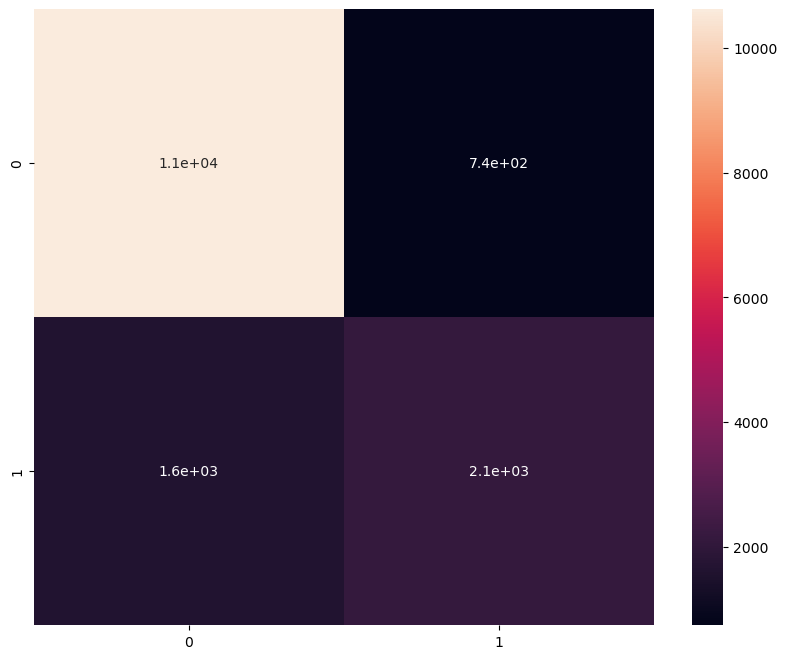

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(test_confusion_matrix,annot=True)
plt.show()

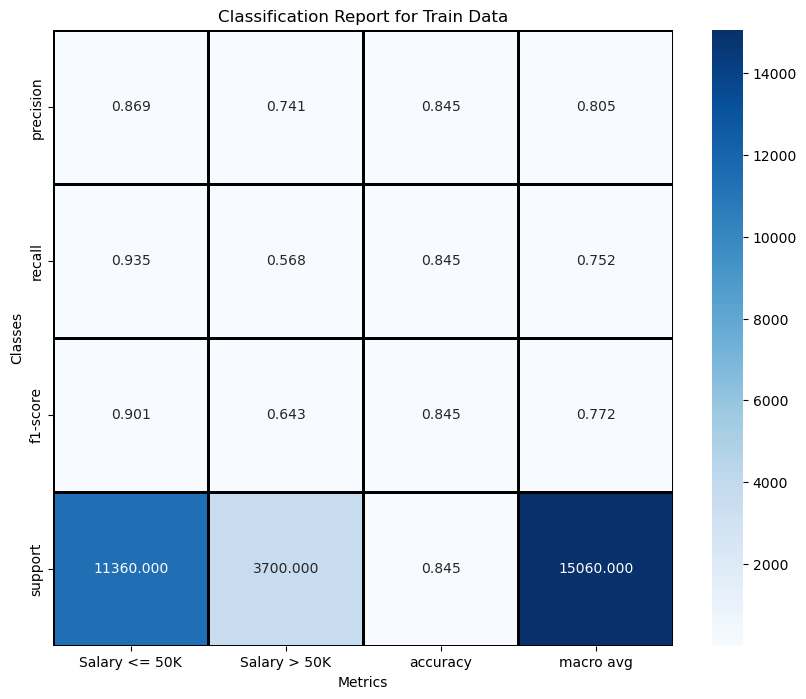

In [ ]:
report = classification_report(y_test,y_pred, target_names=['Salary <= 50K','Salary > 50K'], output_dict=True)

df_report = pd.DataFrame(report).transpose()

plt.figure(figsize=(10, 8))
sns.heatmap(df_report.iloc[:-1, :].T, annot=True, cmap="Blues", fmt=".3f", linewidths=1, linecolor="black")
plt.title('Classification Report for Train Data')
plt.xlabel('Metrics')
plt.ylabel('Classes')
plt.show()

## Let's try to build a new model for Under Sampled Data now because we are getting very low f1-score salary > 50k and we have already seen there was high imbalance in data...during EDA.

In [ ]:
# Create SVM classifier
svm = SVC()

# Grid search with cross-validation
grid_search2 = GridSearchCV(svm, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

In [ ]:
grid_search2.fit(X_resampled,y_resampled)

GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10], 'gamma': [0.01, 0.1, 1],
                         'kernel': ['linear', 'rbf', 'sigmoid']},
             scoring='accuracy')

In [ ]:
print(f"Best Paramamets are {grid_search2.best_params_}")

Best Paramamets are {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}


In [ ]:
best_svm = grid_search2.best_estimator_

In [ ]:
test_accuracy = best_svm.score(x_test,y_test)
print(f"Test Accuracy is {round(test_accuracy*100,2)}%")

Test Accuracy is 78.17%


In [ ]:
y_pred2= best_svm.predict(x_test)

In [ ]:
new_test_confusion = confusion_matrix(y_test,y_pred2)

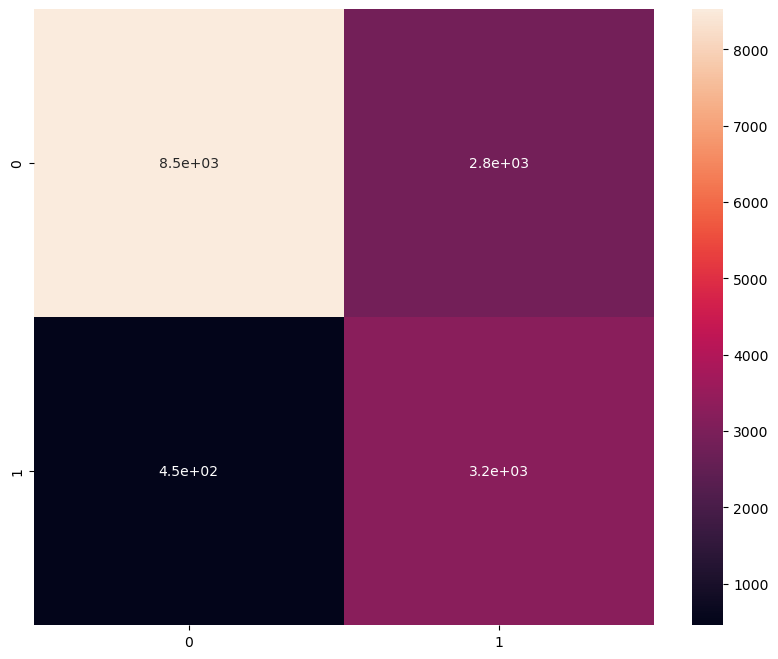

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(new_test_confusion,annot=True)
plt.show()

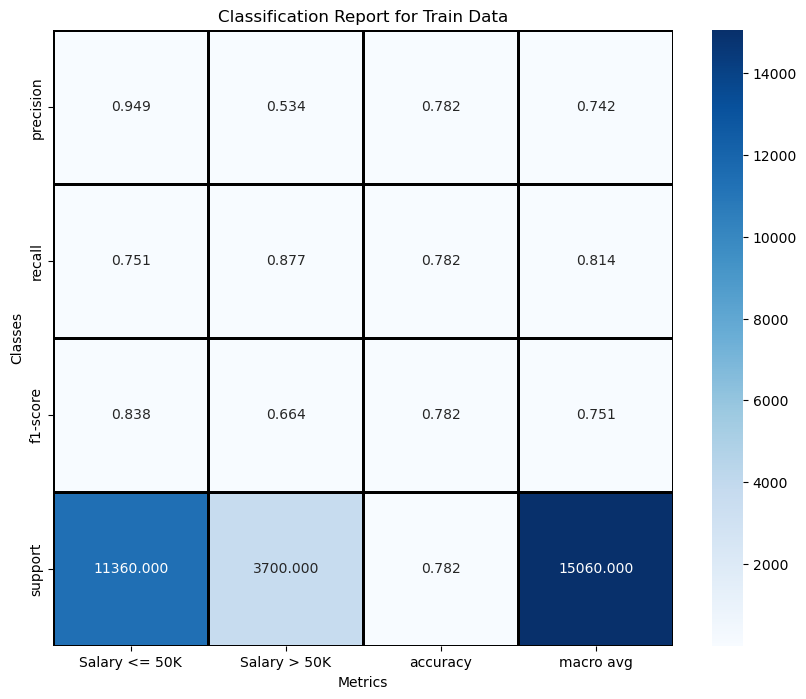

In [ ]:
report = classification_report(y_test,y_pred2, target_names=['Salary <= 50K','Salary > 50K'], output_dict=True)

df_report = pd.DataFrame(report).transpose()

plt.figure(figsize=(10, 8))
sns.heatmap(df_report.iloc[:-1, :].T, annot=True, cmap="Blues", fmt=".3f", linewidths=1, linecolor="black")
plt.title('Classification Report for Train Data')
plt.xlabel('Metrics')
plt.ylabel('Classes')
plt.show()

## For OverSampledData

In [ ]:
# Create SVM classifier
svm = SVC()

# Grid search with cross-validation
grid_search_os = GridSearchCV(svm, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

In [ ]:
grid_search_os.fit(x_oversampled,y_oversampled)

GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10], 'gamma': [0.01, 0.1, 1],
                         'kernel': ['linear', 'rbf', 'sigmoid']},
             scoring='accuracy')

In [ ]:
print(f"Best Paramamets are {grid_search_os.best_params_}")

Best Paramamets are {'C': 10, 'gamma': 1, 'kernel': 'rbf'}


In [ ]:
best_svm_os = grid_search_os.best_estimator_

In [ ]:
test_accuracy = best_svm_os.score(x_test,y_test)
print(f"Test Accuracy is {round(test_accuracy*100,2)}%")

Test Accuracy is 78.03%


In [ ]:
y_pred_os= best_svm_os.predict(x_test)
os_test_confusion = confusion_matrix(y_test,y_pred_os)

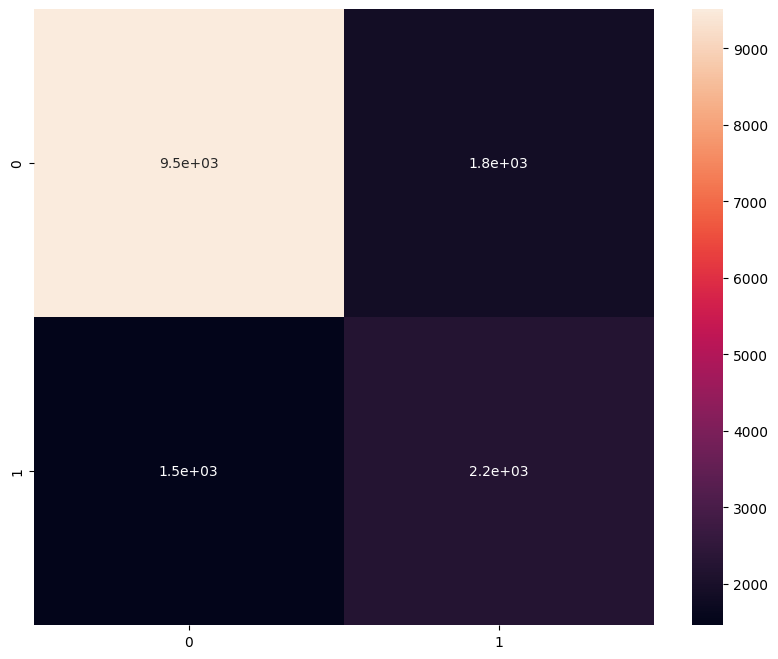

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(os_test_confusion,annot=True)
plt.show()

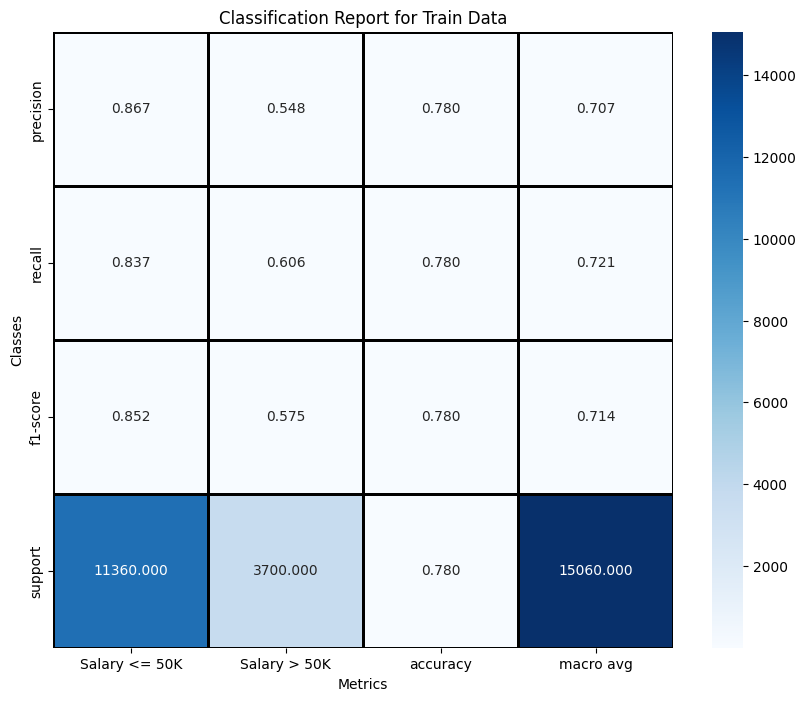

In [ ]:
report = classification_report(y_test,y_pred_os, target_names=['Salary <= 50K','Salary > 50K'], output_dict=True)

df_report = pd.DataFrame(report).transpose()

plt.figure(figsize=(10, 8))
sns.heatmap(df_report.iloc[:-1, :].T, annot=True, cmap="Blues", fmt=".3f", linewidths=1, linecolor="black")
plt.title('Classification Report for Train Data')
plt.xlabel('Metrics')
plt.ylabel('Classes')
plt.show()

## From the classification report and accuracy score it can be clearly seen that there is no advantage in SVM model to undersample or Oversample the data.

## Further it is computationaly expensive, infact it better use data in it orignal state for SVM classification